In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Binary classification

x.shape:  (40,)
y.shape (40,)


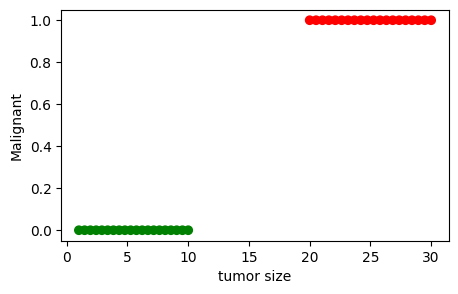

In [2]:
# Generate synthetic data
num = 20

x = np.concatenate([np.linspace(start=1, stop=10, num=num),np.linspace(start=20, stop=30, num=num)]); print('x.shape: ', x.shape)
y = np.concatenate([[0.]*num, [1.]*num]); print('y.shape', y.shape)

colors =['green']*num
for i in range(num):
    colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors)
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.show()

x0.shape (40,)
X.shape (40, 2)
X_train.shape: (30, 2), y_train.shape: (30,) 
X_val.shape: (10, 2), y_val.shape: (10,) 


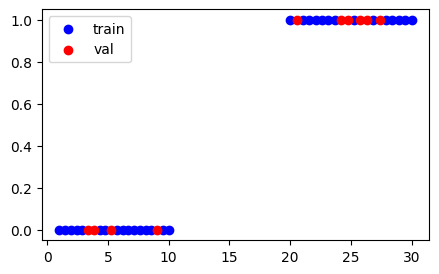

In [3]:
x0 = np.ones_like(x); print('x0.shape', x0.shape)
X = np.stack([x0, x], axis=1); print('X.shape', X.shape)


# Divide dataset into train and val
val_percent = 0.25
n = x.shape[0]
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape} ')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape} ')


plt.figure(figsize = (5,3))
plt.scatter(X_train[:,1],y_train, color ='blue', label = 'train')
plt.scatter(X_val[:,1],y_val, color ='red', label = 'val')
plt.legend()
plt.show()

In [4]:
class BinaryLogisticRegressionCEloss:
  def __init__(self):
    self.theta = None

  def _sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def fit(self, X, y, lr=0.0001,  itrs = 100):
    self.theta = np.random.randn(X.shape[1])
    n = y.shape[0]

    for itr in range(itrs):
      logit = np.dot(X, self.theta)
      y_hat = self._sigmoid(logit)
      self.theta = self.theta - (lr/n)*(X.T@(y_hat-y)) # this update rule is valid only for CE loss.
                                                      # Else not applicable like if we are using MSE.
                                                      # We then need to minimize Loss.

  def predict(self, x):
    logit = x@self.theta
    y_hat = self._sigmoid(logit)
    return y_hat

  def ce_loss(self, y_hat, y):
    return -np.mean(y*np.log(y_hat)+ (1-y)*np.log(1-y_hat))




theta:  [-15.06284856   1.02388971]
Train loss:  [7.99755931e-07 1.29894378e-06 2.10971200e-06 3.42654058e-06
 5.56529781e-06 2.38442365e-05 3.87269400e-05 1.02156357e-04
 1.65914577e-04 2.69460464e-04 4.37614326e-04 7.10665490e-04
 1.15398972e-03 1.87360756e-03 4.93491283e-03 8.00286634e-03
 4.43970912e-03 1.51327195e-03 8.83114845e-04 5.15300311e-04
 3.00656334e-04 1.75412644e-04 1.02338749e-04 2.03211338e-05
 4.03498099e-06 1.37331053e-06 8.01183905e-07 4.67407449e-07
 2.72683595e-07 1.59082489e-07]
Val loss:  [2.59250265e-03 1.18553154e-05 2.35399317e-06 3.04129088e-03
 6.91635899e-06 5.97052749e-05 9.03900546e-06 3.48322432e-05
 1.46808911e-05 6.28985926e-05]
1.0 -> 0.997410854987757
1.0 -> 0.9999881447548349
1.0 -> 0.9999976460096017
0.0 -> 0.0030366708435493944
1.0 -> 0.9999930836649321
1.0 -> 0.99994029650743
0.0 -> 9.038964606760857e-06
1.0 -> 0.9999651683634506
0.0 -> 1.4680783337401846e-05
0.0 -> 6.289661450812844e-05


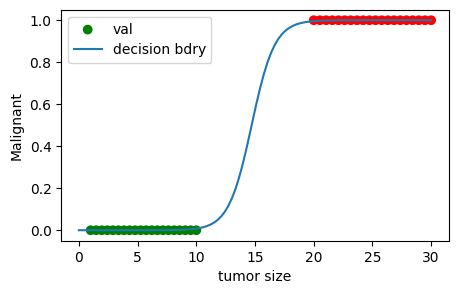

In [5]:
# Initialize model
model = BinaryLogisticRegressionCEloss()

# fit model
model.fit(X_train, y_train, lr=1, itrs = 100)

# get params
print('theta: ', model.theta)

# predict on test/val set
y_preds = model.predict(X_val)

# get loss/ error
print('Train loss: ', model.ce_loss(model.predict(X_train), y_train))
print('Val loss: ', model.ce_loss(y_preds, y_val))

# print side by side for comparison
for (gt, probab) in zip(y_val, y_preds):
    print(f"{gt} -> {probab}")



# plot Decision Boundary

xs = np.linspace(0,30, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = model.predict(Xs)

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors , label = 'val')
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()


# Can we use Linear Regression for classification?

In [8]:
class LinearRegression:
  def __init__(self):
    self.theta = None

  def fit(self, X, y, lr=0.0001,  itrs = 100):
    self.theta = np.random.randn(X.shape[1])
    n = y.shape[0]

    for itr in range(itrs):
      y_hat = np.dot(X, self.theta)
      self.theta = self.theta - (lr/n)*(X.T@(y_hat-y))

  def predict(self, x):
    y_hat = x@self.theta
    return y_hat

  def mse_loss(self, y_hat, y):
    return np.mean((y_hat-y)**2)

theta:  [0.03006959 0.03526565]
Train loss:  0.04224226721788795
Val loss:  0.030709064476514482
1.0 -> 0.7539435527268743
1.0 -> 0.9395522615489093
1.0 -> 0.9952348741955197
0.0 -> 0.3493165674948381
1.0 -> 0.9581131324311127
1.0 -> 0.8838696489022987
0.0 -> 0.1488591619670404
1.0 -> 0.9024305197845022
0.0 -> 0.16556394576102354
0.0 -> 0.21567829714297296


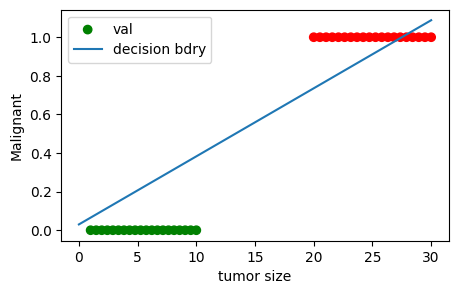

In [15]:
# Initialize model
model = LinearRegression()

# fit model
model.fit(X_train, y_train, lr=0.001, itrs = 100)

# get params
print('theta: ', model.theta)

# predict on test/val set
y_preds = model.predict(X_val)

# get loss/ error
print('Train loss: ', model.mse_loss(model.predict(X_train), y_train))
print('Val loss: ', model.mse_loss(y_preds, y_val))

# print side by side for comparison
for (gt, probab) in zip(y_val, y_preds):
    print(f"{gt} -> {probab}")



# plot Decision Boundary

xs = np.linspace(0,30, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = model.predict(Xs)

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors , label = 'val')
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()


This is not an ideal decision boundary. Because for green points to the right, even though the pred<0.5 but in case of logistic regression these values were close to 0. Similarly for red points on first half have probab>0.5, while in case of logistic regression these values were close to 1. It means that Linear Regression even though perform correct classification is way behind than logistic regression in properly learning the pattern.

## Best solution with Linear Regression - is to limit the predictions to fall between 0 and 1 by passing output through a sigmoid. Let's do that

theta:  [-0.7908166   0.07297946]
Train loss:  0.12249687158479232
Val loss:  0.10843629505116517
1.0 -> 0.6697783881101361
1.0 -> 0.7486236844025891
1.0 -> 0.7696819296504704
0.0 -> 0.4675057623313116
1.0 -> 0.7557827179222416
1.0 -> 0.7263246656643243
0.0 -> 0.36702730606284584
1.0 -> 0.7338930207080095
0.0 -> 0.37509464733544035
0.0 -> 0.3997002656918352


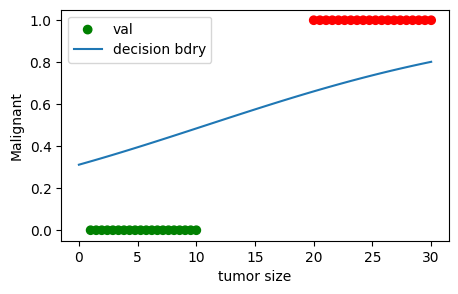

In [22]:
class LinearRegressionSigmoid:
  def __init__(self):
    self.theta = None

  def _sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def fit(self, X, y, lr=0.0001,  itrs = 100):
    self.theta = np.random.randn(X.shape[1])
    n = y.shape[0]

    for itr in range(itrs):
      y_hat = np.dot(X, self.theta)
      self.theta = self.theta - (lr/n)*(X.T@(y_hat-y))

  def predict(self, x):
    y_hat = self._sigmoid(x@self.theta)
    return y_hat

  def mse_loss(self, y_hat, y):
    return np.mean((y_hat-y)**2)


# Initialize model
model = LinearRegressionSigmoid()

# fit model
model.fit(X_train, y_train, lr=0.001, itrs = 500)

# get params
print('theta: ', model.theta)

# predict on test/val set
y_preds = model.predict(X_val)

# get loss/ error
print('Train loss: ', model.mse_loss(model.predict(X_train), y_train))
print('Val loss: ', model.mse_loss(y_preds, y_val))

# print side by side for comparison
for (gt, probab) in zip(y_val, y_preds):
    print(f"{gt} -> {probab}")



# plot Decision Boundary

xs = np.linspace(0,30, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = model.predict(Xs)

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors , label = 'val')
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()


# Can we combine MSE over sigmoidal input aka Can we use MSE loss in Logistic Regression?

In [23]:
class BinaryLogisticRegressionMSEloss:
  def __init__(self):
    self.theta = None

  def _sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def fit(self, X, y, lr=0.0001,  itrs = 100):
    self.theta = np.random.randn(X.shape[1])
    n = y.shape[0]

    for itr in range(itrs):
      logit = np.dot(X, self.theta)
      y_hat = self._sigmoid(logit)
      #self.theta = self.theta - (lr/n)*(X.T@(y_hat-y)) # not applicable if we want to use MSE as loss
      # we need to differentiate loss w.r.t theta and find out the update rule
      # del_LossTheta1 = np.dot(X.T, 2*(y_hat-y)*y_hat*y_hat*np.exp(-logit)) or
      del_LossTheta = np.dot(X.T, 2*(y_hat - y)*y_hat*(1 - y_hat))
      self.theta = self.theta - (lr/n)*del_LossTheta

  def predict(self, x):
    logit = x@self.theta
    y_hat = self._sigmoid(logit)
    return y_hat

  def mse_loss(self, y_hat, y):
    return np.mean((y_hat-y)**2)

theta:  [ 1.47295182 -2.74624071]
Train loss:  0.46844301426723706
Val loss:  0.600000018847002
1.0 -> 1.4402116665479056e-24
1.0 -> 7.606379425351464e-31
1.0 -> 9.95413401636717e-33
0.0 -> 6.963501994454009e-11
1.0 -> 1.7924751824037177e-31
1.0 -> 5.812359755984702e-29
0.0 -> 0.0004188648933185041
1.0 -> 1.369706930353833e-29
0.0 -> 0.00011409168864075628
0.0 -> 2.3038038946377622e-06


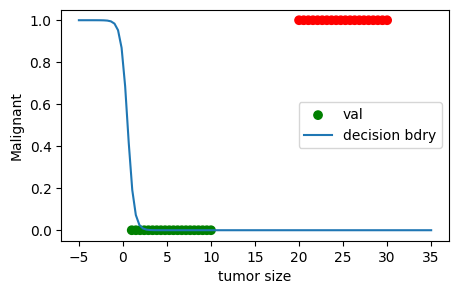

In [24]:
# Initialize model
model = BinaryLogisticRegressionMSEloss()

# fit model
model.fit(X_train, y_train, lr=0.1, itrs = 1000)

# get params
print('theta: ', model.theta)

# predict on test/val set
y_preds = model.predict(X_val)

# get loss/ error
print('Train loss: ', model.mse_loss(model.predict(X_train), y_train))
print('Val loss: ', model.mse_loss(y_preds, y_val))

# print side by side for comparison
for (gt, probab) in zip(y_val, y_preds):
    print(f"{gt} -> {probab}")



# plot Decision Boundary

xs = np.linspace(-5,35, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
ys = model.predict(Xs)

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors , label = 'val')
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()


### We can see that MSE does not fit well when used in Logistic Regression.
In fact I observed that model may or may not fit. Probability to fit (decently) is very less. I will show why is it so..
but before that, let's try this 10 times and see if it fits in any 1 of those 10 times.

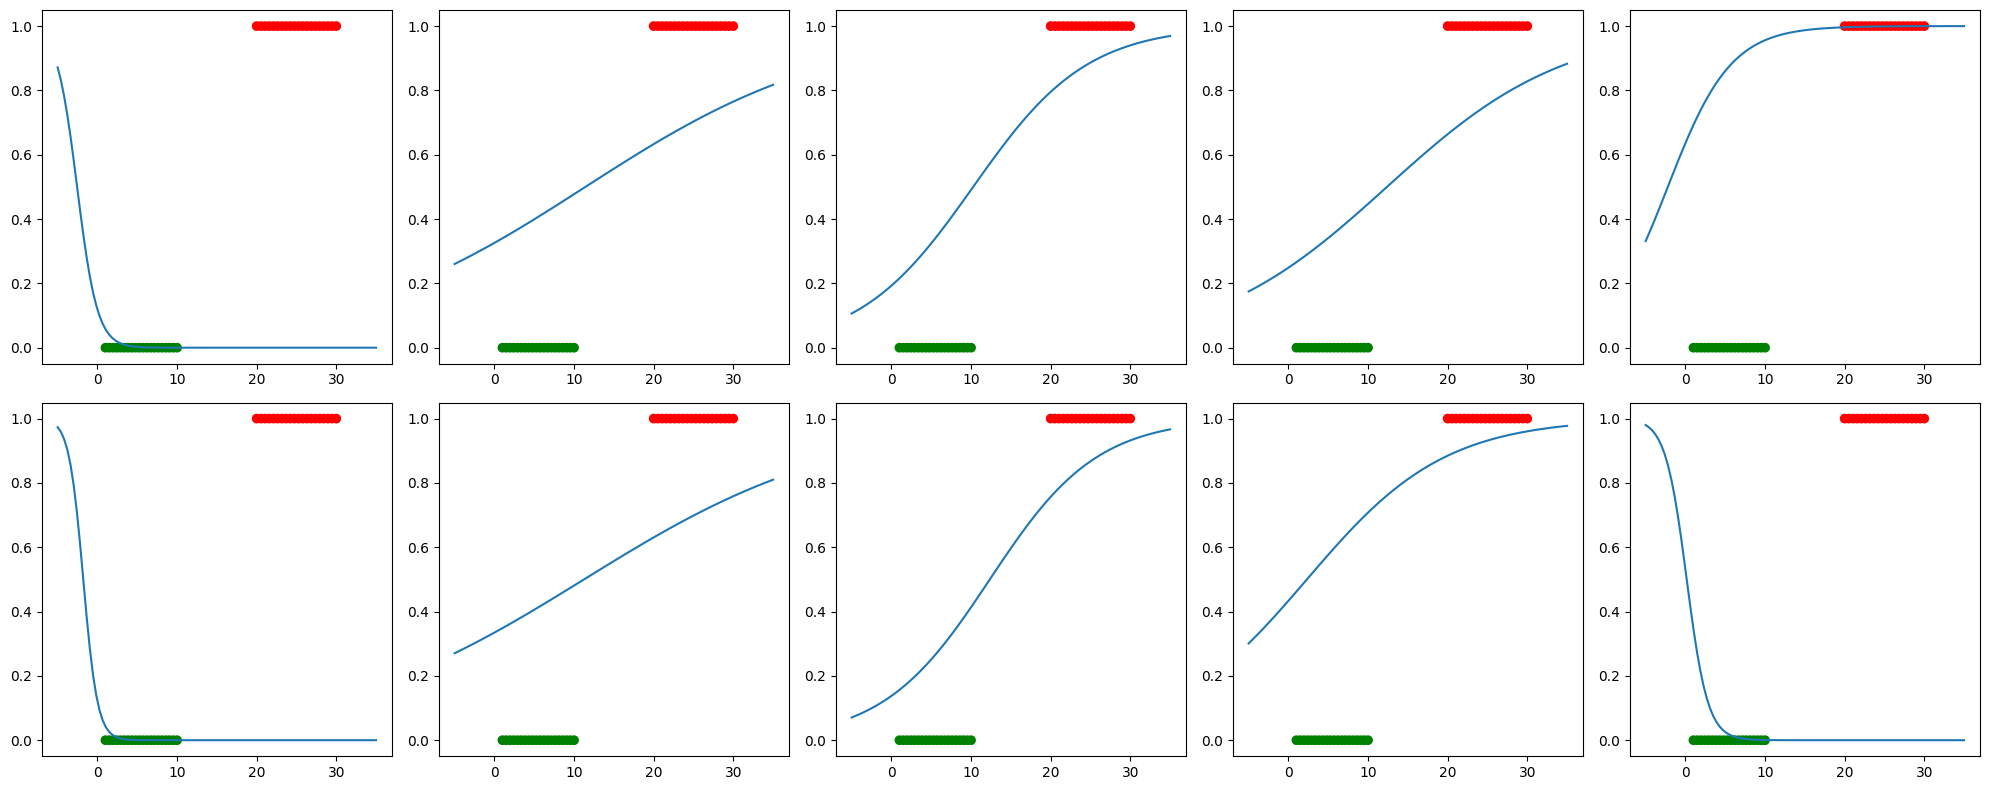

In [30]:
all_xs = []
all_ys = []
for i in range(10):

  model = BinaryLogisticRegressionMSEloss()
  model.fit(X_train, y_train, lr=0.1, itrs = 100)

  # plot Decision Boundary
  xs = np.linspace(-5,35, 100); all_xs.append(xs)
  x0s = np.ones_like(xs)
  Xs = np.stack([x0s, xs], axis=1)
  ys = model.predict(Xs); all_ys.append(ys)

# Create a figure with 10x10 subplots
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 8))

axs = axs.flatten()
for i in range(10):
  axs[i].plot(all_xs[i], all_ys[i])
  axs[i].scatter(x,y, color = colors)

plt.tight_layout()
plt.show()





## We can see it fits decently a few times while rest of the times, it didn't fit at all. Let'see why this happens


In [46]:
def mse_loss(y_hat, y):
    return (y_hat-y)**2


def sigmoid(x):
  return 1/(1+np.exp(-x))

def mse_loss_sigmoid(y_probab, y):
    return (y_probab-y)**2

Text(0.5, 1.0, 'MSE loss in Logistic Regression (Non-Convex)')

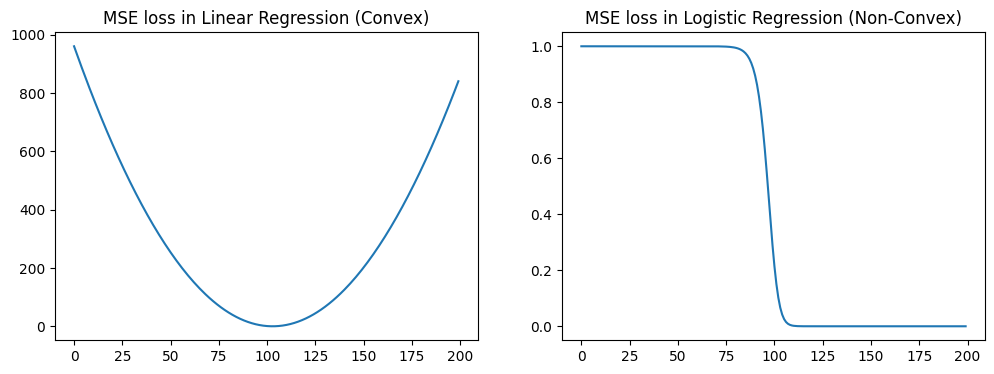

In [52]:
y = 1

# mse in linear regression
y_hats = np.linspace(-30, 30, 200)
mse1 = mse_loss(y_hats, y)


# mse in logistic regression
y_hats2 = sigmoid(y_hats)
mse2 = mse_loss(y_hats2, y)


nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(mse1)
axs[0].set_title('MSE loss in Linear Regression (Convex)')
axs[1].plot(mse2)
axs[1].set_title('MSE loss in Logistic Regression (Non-Convex)')



Now if we notice carefully the MSE loss surface is convex in linear regression while it is not convex for logistic regression. That's why MSE in logistic regression does not always converge or if converge it converges poorly.

So, it is highly sensitive to initialization such that if weights and biases fall in non-convex part -> almost flat (Asymptotes) -> weights wont update -> underfit

Only if weights are initialized in middle Convex part-> gradient descent will take place

####We used MSE for Classification.  __Refer to answer 10-d in https://github.com/mgupta70/literature/blob/main/Logistic%20Regression.pdf for more details on it__